In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import spearmanr

### Correlation between features
Check out this blog on correlation b/w data
[Relationship aka Correlation between Data](https://medium.com/@charlespatel/relationship-aka-correlation-between-features-e1fbc244694e)

In [69]:
data = pd.read_csv('corr.csv')
data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12
0,17.99,10.38,122.80,1001.0,0.11840,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40
1,20.57,17.77,132.90,1326.0,0.08474,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08
2,19.69,21.25,130.00,1203.0,0.10960,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03
3,11.42,20.38,77.58,386.1,0.14250,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23
4,20.29,14.34,135.10,1297.0,0.10030,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44


```
The basic statistics you should know about the feature:

1. Nature of feature, continuous or categorical etc?
2. Distribution of feature, normally distributed, binomially distributed, left or right skewed?
```

### Covariance

In [70]:
data.cov()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12
feature1,9.069593,2.211746,61.280900,880.274688,-0.009703,0.059253,0.001712,-0.010518,0.548742,0.117891,4.156941,85.635383
feature2,2.211746,14.655304,15.327180,191.593487,-0.005494,0.006783,-0.005383,-0.003634,0.093955,0.739157,0.979841,7.533564
feature3,61.280900,15.327180,417.649710,5928.489694,-0.049956,0.439834,0.056868,-0.058076,3.815620,0.992230,29.638063,591.727699
feature4,880.274688,191.593487,5928.489694,86739.146322,-1.020625,5.569580,-0.140496,-1.068464,53.561144,10.251260,402.048547,8462.412940
feature5,-0.009703,-0.005494,-0.049956,-1.020625,0.000170,0.000216,0.000259,0.000092,0.000142,-0.000583,0.000544,-0.012148
feature6,0.059253,0.006783,0.439834,5.569580,0.000216,0.001043,0.000649,0.000099,0.005274,0.000772,0.042450,0.771185
feature7,0.001712,-0.005383,0.056868,-0.140496,0.000259,0.000649,0.000941,0.000196,0.002345,0.000617,0.023089,0.247396
feature8,-0.010518,-0.003634,-0.058076,-1.068464,0.000092,0.000099,0.000196,0.000079,-0.000080,0.000562,0.001222,-0.038354
feature9,0.548742,0.093955,3.815620,53.561144,0.000142,0.005274,0.002345,-0.000080,0.071642,0.049169,0.548823,9.184101
feature10,0.117891,0.739157,0.992230,10.251260,-0.000583,0.000772,0.000617,0.000562,0.049169,0.266280,0.566060,5.059823




```
if covariance has positive sign, features are changing in the same direction
if covariance has negative sign, features are changing in a different direction
if covariance is 0, features are completely independent of each other
```

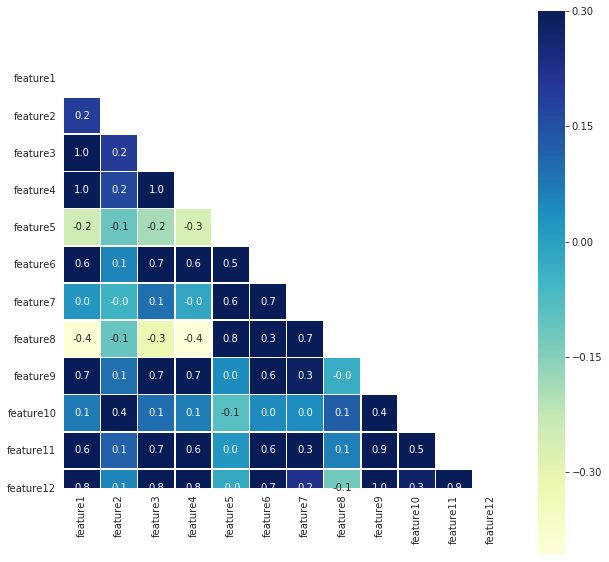

In [71]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="YlGnBu")
    

```
Positive correlation: Two features are directly dependent on each other
Negative correlation: Two features are inversly dependent on each other
Neutral  correlation: Two features are   not    dependent on each other
```

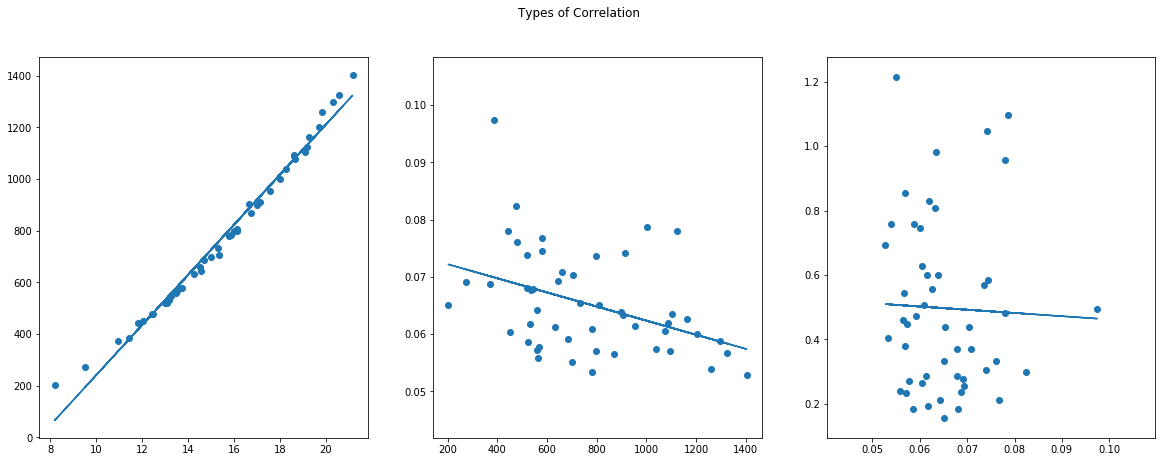

In [72]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 7))
fig.suptitle('Types of Correlation')

ax1.scatter(data.feature1, data.feature4)
m, b = np.polyfit(data.feature1, data.feature4, 1)
ax1.plot(data.feature1, m*data.feature1 + b)

ax2.scatter(data.feature4, data.feature8)
m, b = np.polyfit(data.feature4, data.feature8, 1)
ax2.plot(data.feature4, m*data.feature4 + b)

ax3.scatter(data.feature8, data.feature9)
m, b = np.polyfit(data.feature8, data.feature9, 1)
ax3.plot(data.feature8, m*data.feature8 + b)

In [73]:
def scatter_plot(x, y):
    print(f'featureA: mean: {np.mean(x)} stdv: {np.std(x)}')
    print(f'featureB: mean: {np.mean(y)} stdv: {np.std(y)}')
    print('covariance', np.cov(x, y))
    corr, _ = pearsonr(x, y)
    print('pearsons correlation: %.3f' % corr)

    plt.scatter(x, y)
    plt.show()

### Positive Correlation

featureA: mean: 15.377199999999998 stdv: 2.981308571751673
featureB: mean: 761.998 stdv: 291.5550778086364
covariance [[9.06959265e+00 8.80274688e+02]
 [8.80274688e+02 8.67391463e+04]]
pearsons correlation: 0.992


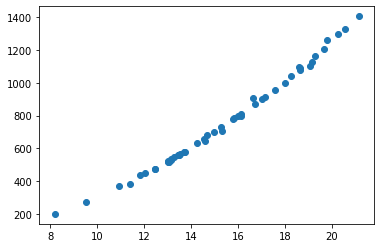

In [74]:
scatter_plot(data.feature1, data.feature4)  # Positive

### Negative Correlation

featureA: mean: 761.998 stdv: 291.5550778086364
featureB: mean: 0.0652736 stdv: 0.008818937976876808
covariance [[ 8.67391463e+04 -1.06846432e+00]
 [-1.06846432e+00  7.93608847e-05]]
pearsons correlation: -0.407


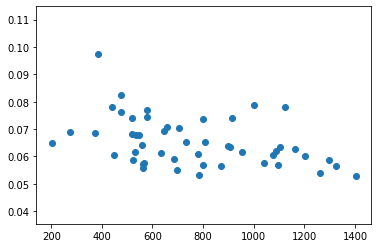

In [75]:
scatter_plot(data.feature4, data.feature8)

### Neutral  Correlation

featureA: mean: 0.0652736 stdv: 0.008818937976876808
featureB: mean: 3.614820000000001 stdv: 2.149845945085368
covariance [[7.93608847e-05 1.22172719e-03]
 [1.22172719e-03 4.71616080e+00]]
pearsons correlation: 0.063


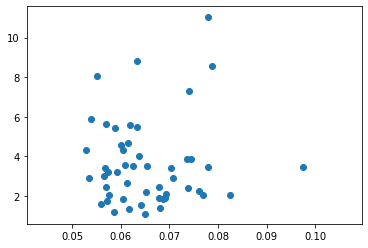

In [76]:
scatter_plot(data.feature8, data.feature11)